# Factors for Pet Dog Aggression towards Humans

# Movtivation
The increasing popularity of dog ownership in tandem with emerging conflicts poses a noteworthy concern in contemporary society. For instance, within our group, one member is a dog owner while another exhibits an intense fear of dogs. The fear of dog bites predominantly drives individuals' apprehension towards dogs, thus sparking our interest in exploring the factors influencing canine aggression towards humans. This study aims to delve into the multifaceted aspects surrounding this issue and shed light on the underlying factors contributing to dog bites.

Driving by the interest, we found a dataset namned [DOHMH Dog Bite Data](https://https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg) which contents dog bite incidents from 2015 to 2021. The data is collected from reports received online, mail, fax or by phone to 311 or NYC DOHMH Animal Bite Unit. The information of date and loccation of the incident, dog breeds, gender, age, and neutering status are included in this dataset. 

However, [DOHMH Dog Bite Data](https://https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg) only recorded the infomation of bite incidents. We want to dig further to have more precise and convincing results. Thus, we introduced [NYC Dog Licensing Dataset](https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp) which recorded all the pet dog's information with licenses. 

Furthermore, we want to figure out if the size is a factor which influencing  dog bite behavior. We use the data from [Dogs Intelligence and Size](https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=dog_intelligence.csv) which have the information of all dog's size and intelligent according to the breeds.

# Basic stats

In [168]:
##import the basic package
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import folium
from folium import plugins
from folium.plugins import HeatMap
import pandas as pd
import json
import zipfile

In [169]:
##load the threee dataset mentioned above
!pip install kaggle

token = {"username":"zihao83","key":"d5c904674d3da0c054166910686ee2fa"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v ./
!kaggle datasets download -d thedevastator/canine-intelligence-and-size

f = zipfile.ZipFile("/content/datasets/thedevastator/canine-intelligence-and-size/canine-intelligence-and-size.zip",'r')
for file in f.namelist():
    f.extract(file,"/content/datasets/")               
f.close()

df_dog_size= pd.read_csv('/content/datasets/AKC Breed Info.csv')
df_dog_size


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
- path is now set to: ./
canine-intelligence-and-size.zip: Skipping, found more recently modified local copy (use --force to force download)


,index,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0,Akita,26,28,80,120
1,1,Anatolian Sheepdog,27,29,100,150
2,2,Bernese Mountain Dog,23,27,85,110
3,3,Bloodhound,24,26,80,120
4,4,Borzoi,26,28,70,100
...,...,...,...,...,...,...
145,145,Papillon,8,11,5,10
146,146,Pomeranian,12,12,3,7
147,147,Poodle Toy,10,10,10,10
148,148,Toy Fox Terrier,10,10,4,7


In [170]:
df_dog_bite = pd.read_csv('https://data.cityofnewyork.us/api/views/rsgh-akpg/rows.csv?accessType=DOWNLOAD')
df_dog_bite

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [171]:
df_dog_licen = pd.read_csv('https://data.cityofnewyork.us/api/views/nu7n-tubp/rows.csv?accessType=DOWNLOAD')
df_dog_licen

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016
...,...,...,...,...,...,...,...,...
508191,PRINCE,M,2016,Samoyed,11221.0,01/23/2020,01/23/2022,2022
508192,UNKNOWN,F,2019,Cavalier King Charles Spaniel,10025.0,01/23/2020,01/23/2021,2022
508193,FINBAR,M,2016,"Poodle, Standard",10023.0,01/23/2020,02/27/2021,2022
508194,UNKNOWN,M,2019,Cockapoo,11378.0,01/23/2020,01/23/2021,2022


## Data cleaning and preprocessing

In [NYC Dog Licensing Dataset](https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp), we do not care about the dog name, the license date information, so we will remove these stuffs. 

And the number of bread types in both datasets is so big. So we decediced to select of the top 10 most frequent dog breeds in [DOHMH Dog Bite Data](https://https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg) with the remaining categories designated as "Others" for both datasets.

The age of the dog also is not formatted, so we need to formatted the age.


In [172]:
##The totally number of breed types in both datastes
##fill the N/A
df_dog_bite['Breed'].fillna('Others')
df_dog_licen['BreedName'].fillna('Others')
dog_bite_bite_bread = df_dog_bite["Breed"].unique()
df_dog_licen_breed = df_dog_licen["BreedName"].unique()
print(len(dog_bite_bite_bread), len(df_dog_licen_breed))

1652 1567


Some breed name like 'Bull Dog, French', have some redundancy information, we only want to have the main breed, e.g. transfer 'Bull Dog, French' to 'Bull Dog'.

In [173]:
## remove the redundancy information
df_dog_bite['Breed'] = df_dog_bite['Breed'].str.split(',').str[0]
df_dog_licen['BreedName'] = df_dog_licen['BreedName'].str.split(',').str[0]
dog_bite_bite_bread = df_dog_bite["Breed"].unique()
df_dog_licen_breed = df_dog_licen["BreedName"].unique()
print(len(dog_bite_bite_bread), len(df_dog_licen_breed))

1625 1536


A lot of breed name contains "Mixed", 'Mix' or 'Crossbreed', as we want the major breed. So we treat the mixed of certain breed as the breed. e.g. 'American Pit Bull Terrier/Pit Bull' as 'Pit Bull'.  And we have figured out the major 8 breeds, we transfer all the breed name which contained the major breeds name into the major breed. e.g. "French Pit Bull" into "Pit Pull"

In [174]:
breeds = df_dog_bite['Breed']
breed_new=[]
word_deleteds=['Mixed', 'Mix', 'Crossbreed']
focus_breed=set(['Pit Bull', 'MIXED BREED', 'Shepherd', 'Shih Tzu', 'Maltese', 'Chihuahua', 'Yorkshire', 'Siberian Husky', 'Shiba Inu', 'Poodle', 'Rottweiler', 'Others'])
for breed in breeds:
  if type(breed) == float:
    breed = "Others"
  for word_deleted in word_deleteds:
    breed = breed.replace(word_deleted, '')
  for focus in focus_breed:
    if focus in breed:
      breed = focus
  breed_new.append(breed)
df_dog_bite['Breed'] = breed_new
dog_bite_bite_bread = df_dog_bite["Breed"].unique()
len(dog_bite_bite_bread)

1604

In [175]:
breeds = df_dog_licen['BreedName']
breed_new=[]
word_deleteds=['Mixed', 'Mix', 'Crossbreed']
for breed in breeds:
  if type(breed) == float:
    breed = "Others"
  for word_deleted in word_deleteds:
    breed = breed.replace(word_deleted, '')
  for focus in focus_breed:
    if focus in breed:
      breed = focus
  breed_new.append(breed)
df_dog_licen['BreedName'] = breed_new
df_dog_licen_breed = df_dog_licen["BreedName"].unique()
len(df_dog_licen_breed)

1301

In [176]:
##top 8 most frequent dog breeds in DOHMH Dog Bite
category_counts = df_dog_bite['Breed'].value_counts()
top_eight_categories = category_counts.head(8).index.tolist()
top_eight_categories

['Pit Bull',
 'UNKNOWN',
 'Others',
 'Shepherd',
 'Chihuahua',
 'Shih Tzu',
 'MIXED BREED',
 '/Other']

In [177]:
##As there is two types which named "UNKNOWN" and "UNCERTAIN" should be included in others, filter top 10 most frequent dog breeds in DOHMH Dog Bite
top_ten_categories = category_counts.head(10).index.tolist()
top_ten_categories

['Pit Bull',
 'UNKNOWN',
 'Others',
 'Shepherd',
 'Chihuahua',
 'Shih Tzu',
 'MIXED BREED',
 '/Other',
 'Yorkshire',
 'Maltese']

In [178]:
top_14_categories = category_counts.head(14).index.tolist()
top_14_categories

['Pit Bull',
 'UNKNOWN',
 'Others',
 'Shepherd',
 'Chihuahua',
 'Shih Tzu',
 'MIXED BREED',
 '/Other',
 'Yorkshire',
 'Maltese',
 'Poodle',
 'MIXED',
 'Rottweiler',
 'Siberian Husky']

In [179]:
focus_breed=set(['Pit Bull', 'MIXED BREED', 'Shepherd', 'Shih Tzu', 'Maltese', 'Chihuahua', 'Yorkshire', 'Siberian Husky', 'Shiba Inu', 'Poodle', 'Rottweiler', 'Others'])
focus_breed = list(focus_breed)

In [180]:
##replace the breed from first dataset
df_dog_bite['Breed'].replace({'American Pit Bull Terrier/Pit Bull': 'Pit Bull', 'American Pit Bull Mix / Pit Bull Mix': 'Pit Bull',
                              'LARGE MIXED BREED': 'MIXED BREED', 'MIXED': 'MIXED BREED',
                              '/Other': 'MIXED BREED', 'MEDIUM MIXED BREED': 'MIXED BREED',
                              'SMALL MIXED BREED': 'MIXED BREED'}, inplace=True)
df_dog_bite.loc[~df_dog_bite['Breed'].isin(focus_breed), 'Breed'] = 'Others'

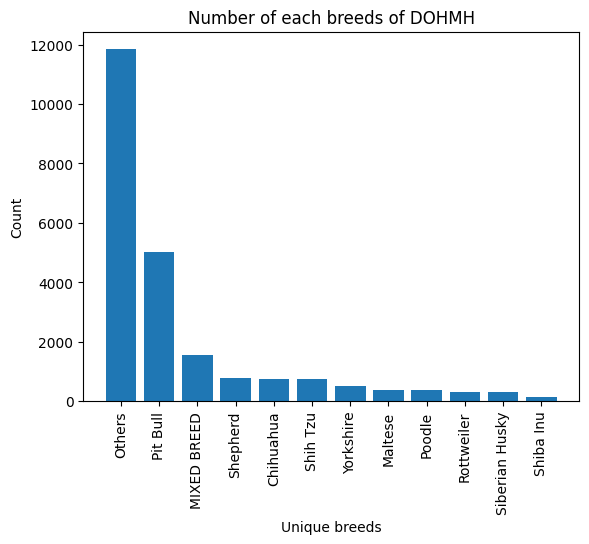

In [181]:
##plot of the bread of DOHMH Dog Bite Data
value_counts = df_dog_bite['Breed'].value_counts()
x = value_counts.index
y = value_counts.values

plt.bar(x, y)
plt.xlabel('Unique breeds')
plt.ylabel('Count')
plt.title('Number of each breeds of DOHMH')
plt.xticks(rotation=90)
plt.show()

In [182]:
category_counts = df_dog_licen["BreedName"].value_counts()
top_20_categories = category_counts.head(20).index.tolist()
top_20_categories

['Unknown',
 'Shih Tzu',
 'Yorkshire',
 'Chihuahua',
 'Poodle',
 'Pit Bull',
 'Maltese',
 'Shepherd',
 'Labrador Retriever',
 'Labrador Retriever ',
 'Pomeranian',
 'Havanese',
 'Beagle',
 'Golden Retriever',
 'French Bulldog',
 'Shiba Inu',
 'Jack Russell Terrier',
 'Cavalier King Charles Spaniel',
 'Siberian Husky',
 'Dachshund']

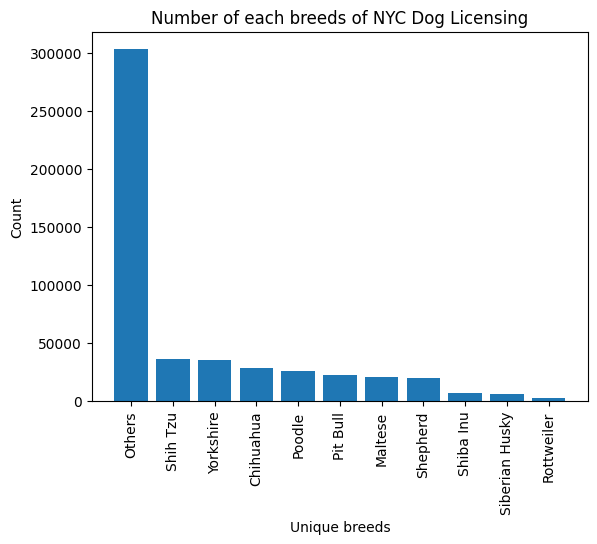

In [183]:
##plot of the bread of NYC Dog Licensing Dataset
df_dog_licen.loc[~df_dog_licen['BreedName'].isin(focus_breed), 'BreedName'] = 'Others'
value_counts = df_dog_licen['BreedName'].value_counts()
x = value_counts.index
y = value_counts.values

plt.bar(x, y)
plt.xlabel('Unique breeds')
plt.ylabel('Count')
plt.title('Number of each breeds of NYC Dog Licensing')
plt.xticks(rotation=90)
plt.show()

In [184]:
##formate the age.

numbers = [str(num) for num in range(1, 13)]
df_dog_bite.loc[~df_dog_bite['Age'].isin(numbers), 'Age'] = 'UN'
df_dog_bite['Age'].unique()

array(['UN', '4', '7', '6', '5', '8', '11', '3', '2', '1', '9', '10',
       '12'], dtype=object)

# Data Analysis



First we want to figure out if some certain breed of dog will be more aggressive to human. Thus we plot the counts of dog bite incidents according to the breed. We can two plots one with "others" on without. As the result we found that pit pull has much more aggressive than other breed of dog.

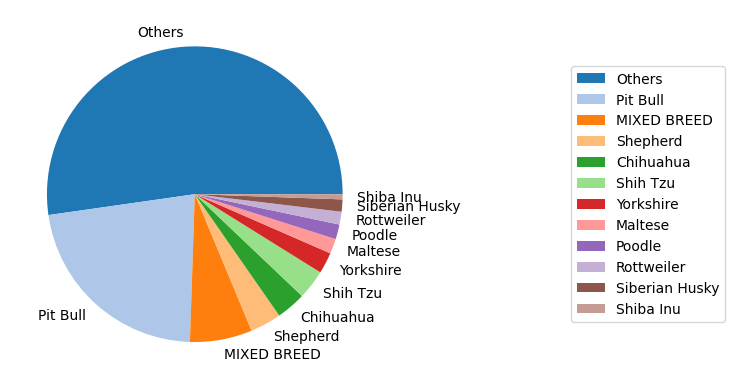

In [117]:
value_counts = df_dog_bite['Breed'].value_counts()
categories = value_counts.index
counts = value_counts.values
cmap = plt.get_cmap('tab20')
plt.pie(counts, labels=categories, colors=cmap(np.arange(len(categories))))
plt.legend(categories, loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [241]:
import plotly.graph_objects as go

df_dog_bite_no = df_dog_bite[df_dog_bite['Breed'] != 'Others']
value_counts = df_dog_bite_no['Breed'].value_counts()
categories = value_counts.index
counts = value_counts.values

data = go.Pie(labels=categories, values=counts)

layout = go.Layout(title="Bite incidents according to the dog breed")

fig = go.Figure(data=[data], layout=layout)

fig.show()
# fig.write_html("breed_pie_chart.html")

Then we want to figure out if the dog bite behavior is related to the age of the dog. We plotted a line graph according to the age. According to the plot, we found that after 2 years old, as the age of dogs increases gradually, the occurrence of dog bites diminishes.

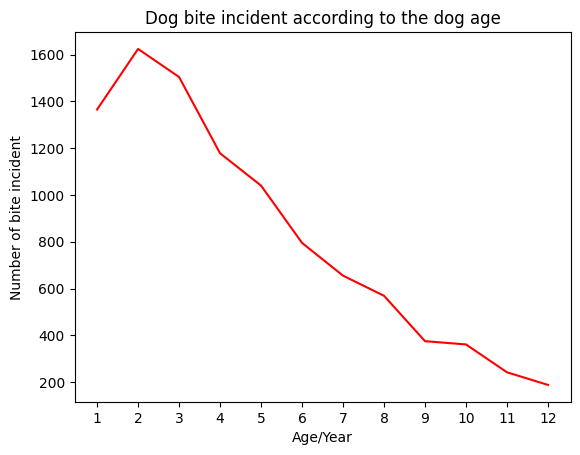

In [194]:
df_dog_bite_no = df_dog_bite[df_dog_bite['Age'] != 'UN']
df_dog_bite_no = pd.to_numeric(df_dog_bite_no['Age'])
value_counts =df_dog_bite_no.value_counts()
value_counts_sorted = value_counts.sort_index()

values = value_counts_sorted.index
counts = value_counts_sorted.values
x = range(len(values))
plt.plot(x, counts, color='red')

plt.xticks(x, values)

plt.title("Dog bite incident according to the dog age")
plt.xlabel("Age/Year")
plt.ylabel("Number of bite incident")

plt.show()


In our study, we aimed to explore the potential influence of gender and neutering status on dog bite behavior. We employed an interactive pie chart to visualize the data. Our findings indicated that unneutered males exhibited a significantly higher level of aggressiveness.

In [209]:
df_dog_bite_no = df_dog_bite[df_dog_bite['Gender'] != 'U']
value_counts =df_dog_bite_no['Gender'].value_counts()
value_counts2 = df_dog_bite['SpayNeuter'].value_counts()

In [217]:
import plotly.graph_objects as go

df_dog_bite_no = df_dog_bite[df_dog_bite['Gender'] != 'U']
value_counts =df_dog_bite_no['Gender'].value_counts()
value_counts2 = df_dog_bite['SpayNeuter'].value_counts()

labels1 = value_counts.index
values1 = value_counts.values

labels2 = value_counts2.index
values2 = value_counts2.values

data1 = go.Pie(labels=labels1, values=values1, name="Gender")
data2 = go.Pie(labels=labels2, values=values2, name="Neutering Status")

fig = go.Figure(data=[data1, data2])

buttons = [
    dict(label="Gender", method="update", args=[{"visible": [True, False]}]),
    dict(label="Neutering Status", method="update", args=[{"visible": [False, True]}])
]

fig.update_layout(showlegend=True)
fig.data[1].visible = False

fig.update_layout(updatemenus=[dict(type="buttons", buttons=buttons)])

fig.update_layout(legend=dict(font=dict(size=30)))

# fig.write_html("gender.html")
fig.show()

To delve deeper into the matter, it should be noted that the previous data from the DOHMH Dog Bite Dataset only reflects incidents involving dogs that have already bitten humans. Therefore, a conclusive analysis cannot be made without considering the distribution ratios of specific factors among the entire population of pet dogs in New York City. To address this, we have incorporated the [NYC Dog Licensing Dataset](https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp) to examine the distribution of these factors that influence dog aggression within the broader population of pet dogs.

For this proposes, we tried to combined two datasets to have a deeper analysis. In this chart, we can clearly find that pit bull and rottweiler have much more possiblities to bite human. 

In [237]:
focus_breed_1=set(['Pit Bull', 'Shepherd', 'Shih Tzu', 'Maltese', 'Chihuahua', 'Yorkshire', 'Siberian Husky', 'Shiba Inu', 'Poodle', 'Rottweiler','Others'])
focus_breed_1 = list(focus_breed_1)
bite_count = df_dog_bite_no['Breed'].value_counts()
licen_count = df_dog_licen["BreedName"].value_counts()

ratio_lis=[]
for breed in focus_breed_1:
  ratio_lis.append(round(bite_count[breed]/licen_count[breed], 4))
colors = ['#FF4136', '#FF851B', '#FFDC00', '#2ECC40', '#0074D9', '#B10DC9', '#FF6D00', '#39CCCC', '#F012BE', '#85144b', '#000000']
fig = go.Figure(data=[go.Bar(x=focus_breed_1, y=ratio_lis, marker=dict(color=colors))])
fig.update_layout(title='Dog Bites ratio according to the breed', xaxis_title='Breed', yaxis_title='Ratio')
fig.show()
# fig.write_html("ratio_breed.html")

In [244]:
categories = ['0-3', '3-6', '6-9', 'Over 9']
values1 = [20, 30, 25, 35]
values2 = [15, 27, 22, 30]

data = [
    go.Bar(x=categories, y=values1, name='Male'),
    go.Bar(x=categories, y=values2, name='Female')
]
layout = go.Layout(
    xaxis=dict(title='Age'),
    yaxis=dict(title='Ratio'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

# 显示图表
fig.show()